In [11]:
import numpy as np
import os #???
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
class Perceptron:
    """
    Perceptron classifier
    """
    
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # Initialize parameters
        # eta: float, learning rate
        # n_iter: int, number of iterations during training
        # random_state: int, seed used for random initialization of weights and bias
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # Fit the model to data (adjusting weights and bias)
        
        # Random generator
        # Initialize the generator.
        # self.random_state is a seed. rgen is a pseudo-random number generator. If the seed does not change, the result won't change either.
        rgen = np.random.RandomState(self.random_state) 
        # randomly generate weights from a normal distribution
        # loc: mean
        # scale: standard deviation
        # size: if it is a number, then return a random number. If it is a tuple, e.g. (2,3), then return an array.
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # Initialize the bias as zero.
        # np.float_ is the float type in numpy
        # Just ignore the difference between np.float and the float type in python at the moment.
        self.b_ = np.float_(0.)
        # Number of misclassifications for each iteration
        self.errors_ = []
        
        for _ in range(self.n_iter):
            # Initialize the number of misclassification
            errors = 0
            # Update weights and bias
            # zip(X,y): X is a 2D-array. y is a vector. zip iterates X by using its first index
            for xi, target in zip(X,y):
                # Update weights and bias once for each example
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                # If update is not zero, the prediction is wrong.
                # Then the number of misclassification +=1
                # A more straightforward way is: 
                # if update!=0.0:
                #    errors += 1
                errors += int(update!=0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        # We need to calculate z = w.x+b for each example
        # But this can be done for all examples simultaneously
        # Note that self.w_ is a 1D vector. np.dot(X, self.w_) gives a 1D vector, not a column vector
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, 0)
        # np.where: if the condition is true, return the first value, otherwise the second.
    

In [13]:
# Loading data
# Data source
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Read data directly from the URL
df = pd.read_csv(s, header=None, encoding='utf-8')
# I have also downloaded the data. So the following code also works.
# df = pd.read_csv('./data/iris.data')

# Print the last 5 rows
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


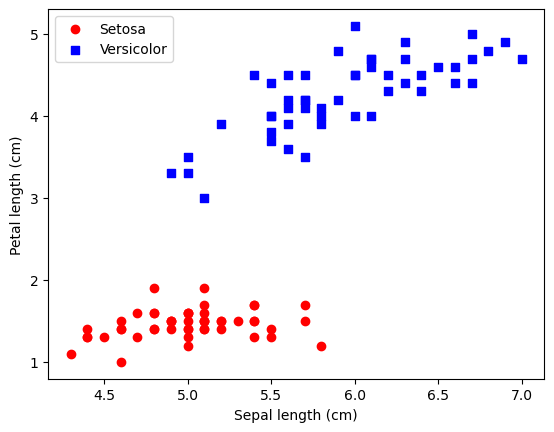

In [14]:
# Create labels
# 'Iris-setosa' --> 0   'Iris-virginica' --> 1
y = df.iloc[0:100, 4].values   
y = np.where(y == 'Iris-setosa', 0, 1)
# Get two features
X = df.iloc[0:100, [0,2]].values
# Plot data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa')
ax.scatter(X[50:100,0], X[50:100,1], color='blue', marker='s', label='Versicolor')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Petal length (cm)')
ax.legend(loc='upper left')

Text(0, 0.5, 'Number of misclassification/Number of updates')

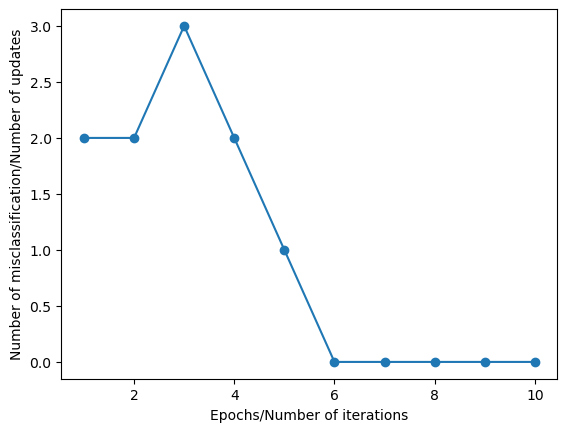

In [15]:
# Train a perceptron
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X,y)
# Plot misclassification
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
ax.set_xlabel('Epochs/Number of iterations')
ax.set_ylabel('Number of misclassification/Number of updates')
# Note that the figure may not be the same as the one in the book.
# If we change the value of 'random_state', then we may get the figure in the book.

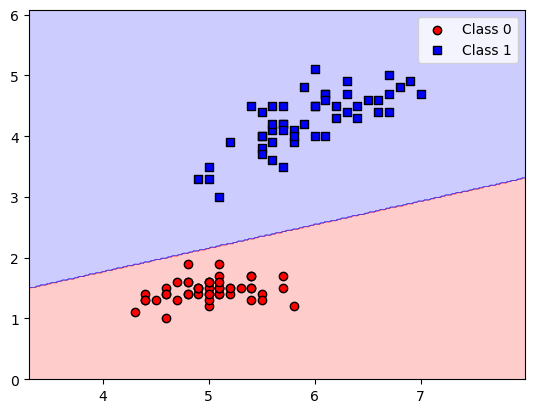

In [37]:
# Visualizing the decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    ax.legend()
    
plot_decision_regions(X, y, ppn)

In [18]:
ppn.predict(X).shape

(100,)

In [20]:
ppn.net_input(X).shape

(100,)

In [21]:
ppn.b_.shape

()

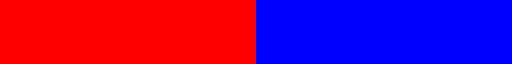

In [28]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
cmap

In [34]:
enumerate(np.unique(y))